># N-클래스 대응하기

- 신경망에서 N-클래스로 확장하 때에는 단순히 출력츠의 유닛 수를 클래스 수만큼 늘리는 방식으로 해결

In [1]:
import numpy as np

___
>## one-hot-vector

- 식별에서 레이블을 설정하는 방법은, 일반적으로 0부터 N까지의 값 중 하나를 할당하는 방식을 사용
- 신경망을 사용할 때에는 **one-hot-vector**형식을 사용할 때 일반적으로 더 좋은 결과를 반환
- 여기서 one-hot-vector는 N개의 0과 1로 이루어진 벡터를 의미(더미변수와 유사)
- 예를 들어, 4-class 데이터 세트의 레이블이 0이라면 [1, 0, 0, 0], 2라면 [0, 0, 1, 0]으로 표현

- one-hot-vector를 숫자 레이블로 변환하는 방법은 `argmax`를 사용하면 배열 중 가장 큰 요소의 인덱스를 반환하여 쉽게 변환 가능

In [3]:
onehot = [0, 0, 1, 0]
label = np.argmax(onehot)
print(label)
print('=====')

onehot = [[1, 0, 0, 0],
         [0, 0, 1, 0]]
labels = np.argmax(onehot, axis = 1)
print(labels)

2
=====
[0 2]


- 반대로 숫자 레이블을 one-hot-vector로 변환시에는 `np.zeros`활용

In [4]:
onehot = np.zeros(4)
onehot[label]=1
onehot

array([0., 0., 1., 0.])

- 혹은 `sklearn`의 `OneHotEncoder`를 사용 가능

In [7]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(n_values=4)

labels = [[0], [2]]

enc.fit_transform(labels).toarray()

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.]])

___
>## 소프트맥스 함수

- 출력층의 활성화 함수로는 소프트맥스 함수를 사용
- 소프트맥스 함수는 단순히 출력층의 모든 출력값의 합을 1로(확률로) 만드는 함수임
- 합을 1로 만드는 방법은 다양하나 소프트맥스는 "각 점수벡터에 지수를 취하고 정규화 상수로 나눈 값"을 반환  
    $y_k = \frac{exp(a_k)}{\sum^n_{i=1}exp(a_i)}$

In [28]:
def softmax(scores):
    f = scores
    f -= np.max(f)  ## 지수 계산이 무한대로 가는 것을 방지
    return np.exp(f) / np.sum(np.exp(f))

In [31]:
outputs = np.array([1, 2, 788,789])
pred = softmax(outputs)

np.set_printoptions(formatter={'float': '{: 0.6f}'.format})
print(pred)

[ 0.000000  0.000000  0.268941  0.731059]


- 위 추론결과를 보면 정답은 3이고, 확률이 73.1059%가 됨
- 중요한 것은 소프트맥스 함수를 통해 **정답과 추론확률의 차이를 신경망의 손실로 표현이 가능**해진다는 점임

Text(0.5,1,'Line curve for Softmax function\n')

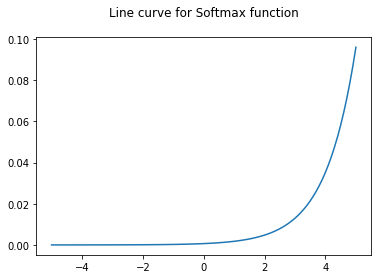

In [41]:
X = np.linspace(-5,5,100)
fx = softmax(X)
X = np.linspace(-5,5,100)
plot(X,fx)
plt.title('Line curve for Softmax function\n')

___
>## 손실 함수

- 가장 단순한 손실함수로는 정답과 추론의 차이를 제곱합으로 나타낸 평균제곱오차(MSE)가 있음

In [42]:
def mse(pred, label):
    return 0.5 * np.sum((pred - label)**2)

In [44]:
labels = [0., 0., 0., 1.]
print('MSE when right: {}'.format(mse(pred, labels)))
print('MSE when wrong: {}'.format(mse(pred, [1., 0., 0., 0.])))

MSE when right: 0.07232948812851325
MSE when wrong: 0.8033880667585181


- 소프트맥스와 자주 함께 사용하는 손실함수로는 **교차 엔트로피 오차**가 있음
- 이는 추론 결과에 로그를 취하여 오차가 클수록 지수적으로 손실이 증가

In [45]:
def cross_entropy(pred, label):
    return -np.sum(label * np.log(pred.clip(1e-6)))

In [46]:
labels = [0., 0., 0., 1.]
print('MSE when right: {}'.format(cross_entropy(pred, labels)))
print('MSE when wrong: {}'.format(cross_entropy(pred, [1., 0., 0., 0.])))

MSE when right: 0.3132616875182228
MSE when wrong: 13.815510557964274


___
>## 참고. 손실함수 그래프

In [47]:
X = range(0,100)
pred = softmax(X)

labels = np.zeros(100)
labels[99] = 1

Text(0.5,1,'loss function using MSE\n')

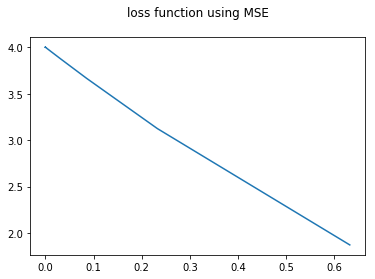

In [56]:
plot(pred, (pred-label)**2)
plt.title('loss function using MSE\n')

Text(0.5,1,'loss function using cross-entropy\n')

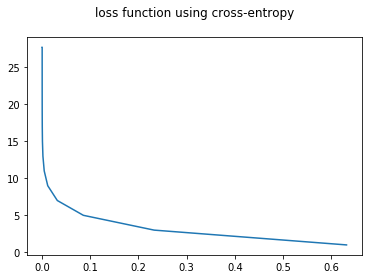

In [58]:
plot(pred, -label*np.log(pred.clip(1e-6)))
plt.title('loss function using cross-entropy\n')